In [119]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
markov_chain = [] #will be the Markov chain x1, x2, x3 ... xt
markov_chain.append(np.random.randint(1,10)) #initialize at random integer
logs = open('metropolis.log','w')

In [121]:
def target(x):
    if x < 0: return 0
    return np.exp(-x) #defining our target distribution to sample from

In [122]:
# generating markov chain
for i in range(10000):
    proposition = markov_chain[i] + np.random.normal(0,1)
    acceptance_prob = target(proposition)/target(markov_chain[i])
    if acceptance_prob > 1:
        acceptance_prob=1
    reject_or_accept = np.random.uniform(0,1)
    logs.write('Current: ' + str(markov_chain[i]) + '\t' + 'Proposed: ' + str(proposition) + '\n' + 'Probability: ' + str(acceptance_prob) + '\t')
    if reject_or_accept > acceptance_prob:
        markov_chain.append(markov_chain[i])
        logs.write('Decision: REJECT\n\n')
    else:
        markov_chain.append(proposition)
        logs.write('Decision: ACCEPT\n\n')

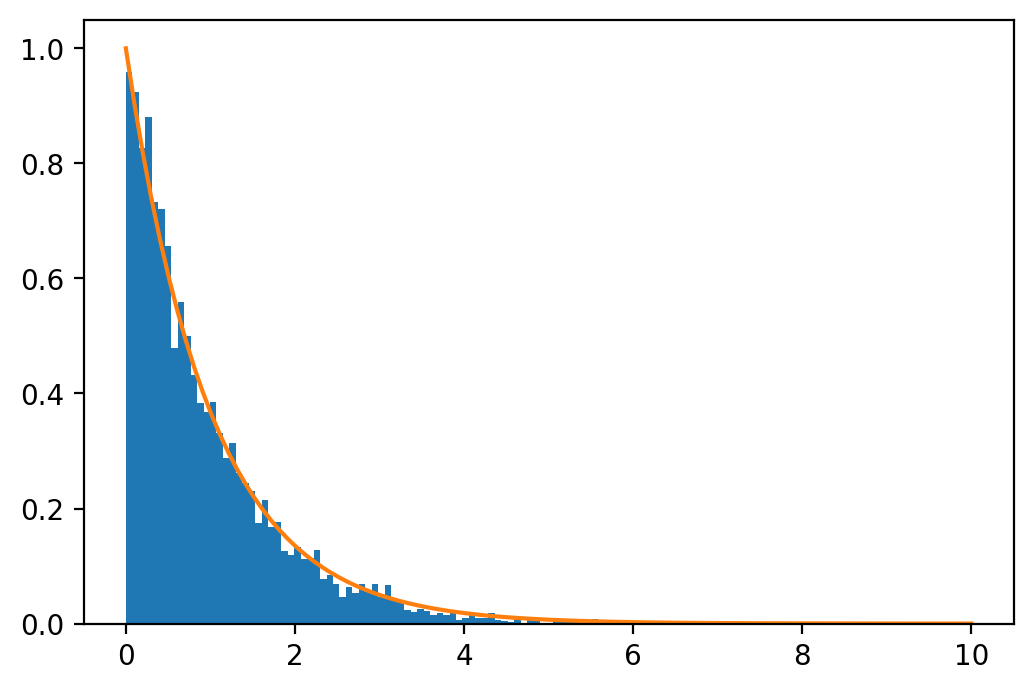

In [123]:
plt.figure(dpi=200)
plt.hist(markov_chain,bins=100,density=True)
x = np.linspace(0, 10, 100)
y = np.exp(-x)
plt.plot(x, y)
plt.show()